# Random forest

Zadanie 1: Klasyfikacja gatunków kosaćca (Iris dataset)
Treść: Wykonaj klasyfikację gatunków kosaćca na podstawie cech morfologicznych.
Dodatkowo: Sprawdź, jak zmieniają się metryki klasyfikacji w zależności od liczby drzew w lesie (n_estimators).

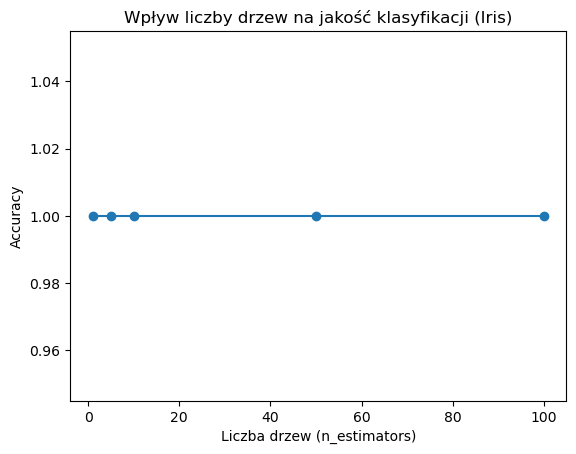

In [7]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimators_range = [1, 5, 10, 50, 100]
scores = []

for n in estimators_range:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    scores.append(report['accuracy'])

plt.plot(estimators_range, scores, marker='o')
plt.xlabel('Liczba drzew (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Wpływ liczby drzew na jakość klasyfikacji (Iris)')
plt.show()

Zadanie 2: Wykrywanie cukrzycy (Diabetes dataset)
Treść: Dokonaj klasyfikacja obecności cukrzycy.
Dodatkowo: Porównaj skuteczność modelu w zależności od maksymalnej głębokości drzewa (max_depth).

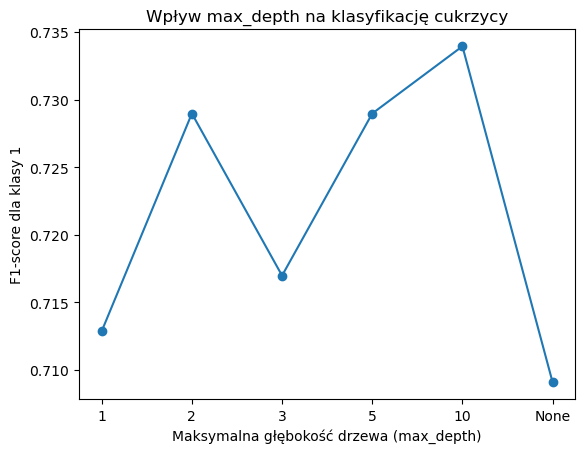

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = load_diabetes(return_X_y=True)
y = (y > y.mean()).astype(int) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

depths = [1, 2, 3, 5, 10, None]
f1_scores = []

for d in depths:
    clf = RandomForestClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_scores.append(report['1']['f1-score'])

plt.plot([str(d) for d in depths], f1_scores, marker='o')
plt.xlabel('Maksymalna głębokość drzewa (max_depth)')
plt.ylabel('F1-score dla klasy 1')
plt.title('Wpływ max_depth na klasyfikację cukrzycy')
plt.show()

Zadanie 3: Rozpoznawanie cyfr (Digits dataset)
Treść: Wykonaj klasyfikację cyfr odręcznych (0–9).
Dodatkowo: Sprawdź, jak zmienia się skuteczność klasyfikacji w zależności od liczby cech losowanych przy każdym podziale (max_features).

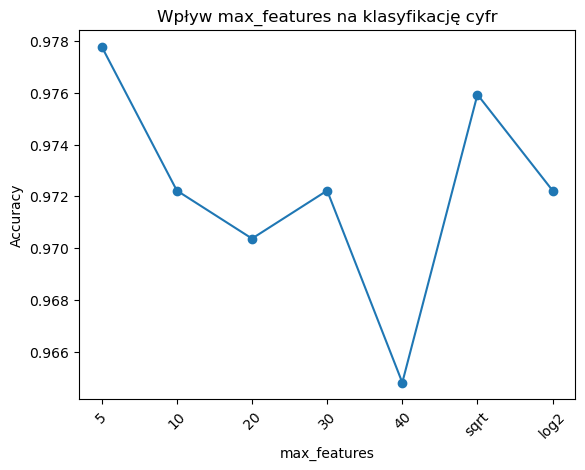

In [11]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

features_range = [5, 10, 20, 30, 40, 'sqrt', 'log2']
accuracies = []

for mf in features_range:
    clf = RandomForestClassifier(max_features=mf, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracies.append(report['accuracy'])

plt.plot([str(mf) for mf in features_range], accuracies, marker='o')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.title('Wpływ max_features na klasyfikację cyfr')
plt.xticks(rotation=45)
plt.show()

Zadanie 4: Klasyfikacja nowotworów piersi (Breast Cancer Wisconsin dataset)
Cel: Zbuduj klasyfikator rozpoznający, czy guz piersi jest złośliwy czy łagodny, na podstawie cech diagnostycznych.
Dodatkowo: Zbadaj, jak wpływa parametr criterion (gini vs entropy) na jakość klasyfikacji 
(metryki: precision, recall, F1-score).

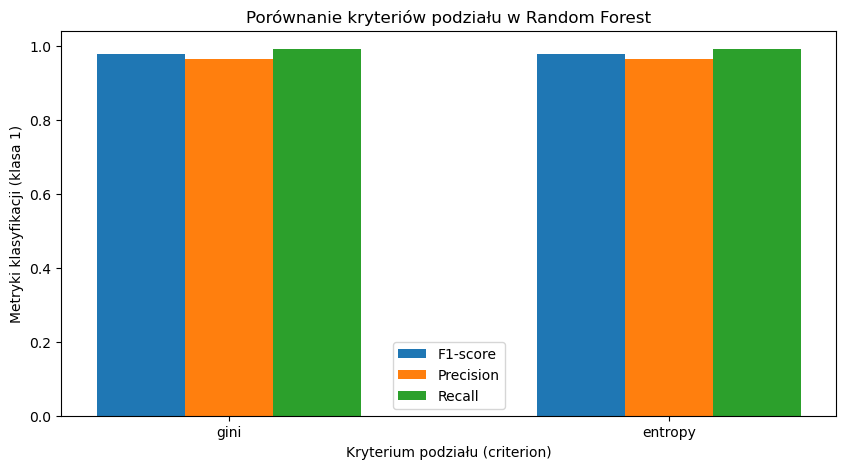

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

criteria = ['gini', 'entropy']
f1_scores = []
precision_scores = []
recall_scores = []

for crit in criteria:
    clf = RandomForestClassifier(criterion=crit, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_scores.append(report['1']['f1-score'])
    precision_scores.append(report['1']['precision'])
    recall_scores.append(report['1']['recall'])

x = range(len(criteria))
plt.figure(figsize=(10, 5))
plt.bar(x, f1_scores, width=0.2, label='F1-score', align='center')
plt.bar([i + 0.2 for i in x], precision_scores, width=0.2, label='Precision', align='center')
plt.bar([i + 0.4 for i in x], recall_scores, width=0.2, label='Recall', align='center')
plt.xticks([i + 0.2 for i in x], criteria)
plt.xlabel('Kryterium podziału (criterion)')
plt.ylabel('Metryki klasyfikacji (klasa 1)')
plt.title('Porównanie kryteriów podziału w Random Forest')
plt.legend()
plt.show()

# PCA

Zadanie 1: Redukcja wymiaru i wizualizacja zbioru Iris
Treść: Użyć PCA do sprowadzenia danych Iris do 2 wymiarów i zobaczyć, jak dobrze rozróżniają się gatunki kwiatów po transformacji.

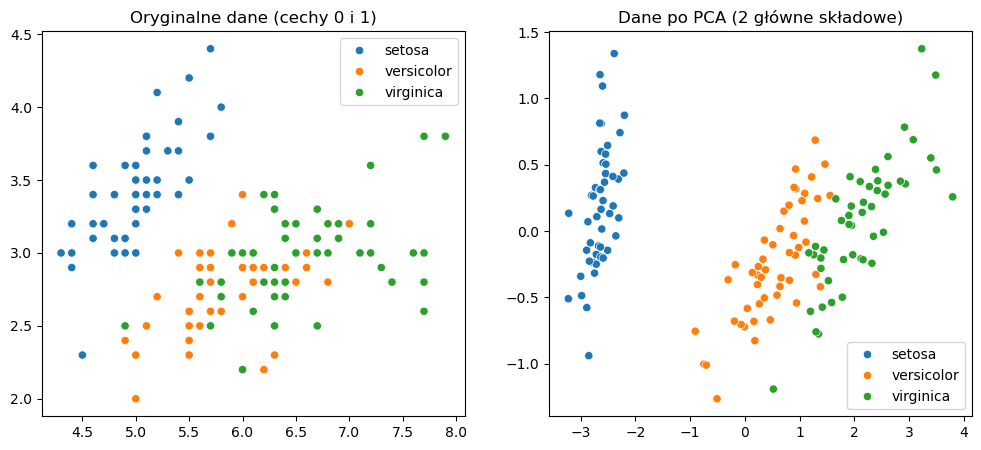

In [18]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

iris = load_iris()
X, y = iris.data, iris.target
labels = iris.target_names

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=[labels[i] for i in y])
plt.title("Oryginalne dane (cechy 0 i 1)")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=[labels[i] for i in y])
plt.title("Dane po PCA (2 główne składowe)")
plt.show()

Zadanie 2: Wizualizacja cyfr po PCA (Digits dataset)
Treść: Sprowadzenie 64-wymiarowych danych obrazów cyfr do 2D, wizualizacja i analiza, jak rozróżnialne są klasy.

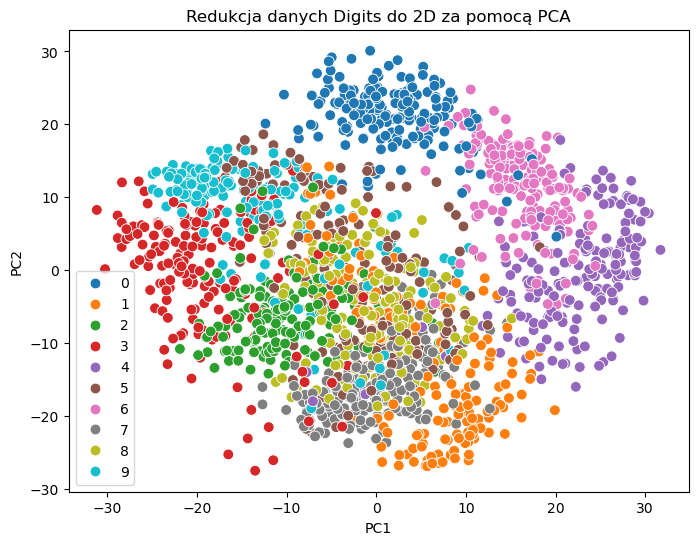

In [21]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

digits = load_digits()
X, y = digits.data, digits.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', s=60, legend='full')
plt.title("Redukcja danych Digits do 2D za pomocą PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Zadanie 3: Wizualizacja danych Breast Cancer z PCA
Treść: Sprawdzenie, czy przypadki złośliwe i łagodne można rozróżnić po redukcji do 2D.

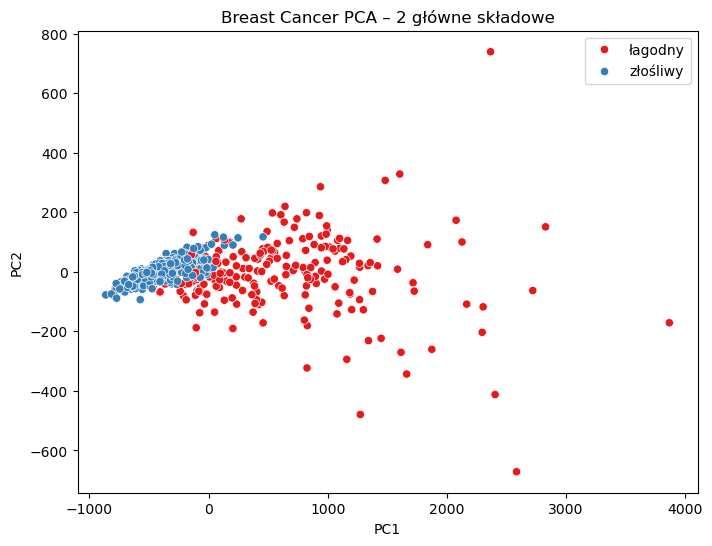

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X, y = data.data, data.target
labels = ['łagodny', 'złośliwy']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=[labels[i] for i in y], palette='Set1')
plt.title("Breast Cancer PCA – 2 główne składowe")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Zadanie 4: PCA + klasyfikacja (Digits dataset)
Treść: Zastosować PCA przed klasyfikacją i sprawdzić, jak spada accuracy w zależności od liczby głównych składowych.


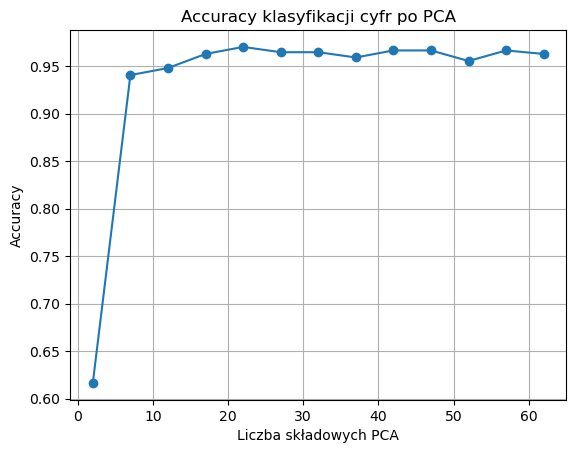

In [27]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

components = list(range(2, 65, 5))
accuracies = []

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    
    accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(components, accuracies, marker='o')
plt.title("Accuracy klasyfikacji cyfr po PCA")
plt.xlabel("Liczba składowych PCA")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()